# Tutorial for simple unsupervised learning

This tutorial is a simple walkthrough of unsupervised learning using the famous Iris flower dataset.

Goal: 
* Exploratory data analysis
* Fit kmeans clustering algorithim
* Optimize


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
from sklearn import datasets 

In [138]:
# Load dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [139]:
# Create Dataframes
iris_df = pd.DataFrame(features)
target_df = pd.Series(target)

In [140]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [141]:
labels = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
target_df= target_df.map(labels)

In [142]:
iris_df = pd.concat([iris_df, target_df], axis = 1, ignore_index = True)

In [143]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [144]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Explore data 

In [81]:
import seaborn as sns

In [123]:
iris_df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

50 of each species, so balanced.

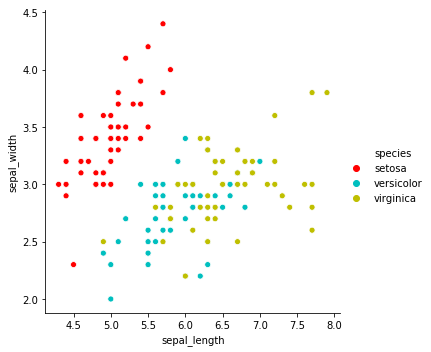

In [82]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species' , data = iris_df,  palette=["r", "c", "y"])

Can see a clear seperation between setosa and veriscolor/virginica but not between veriscolor/virginica

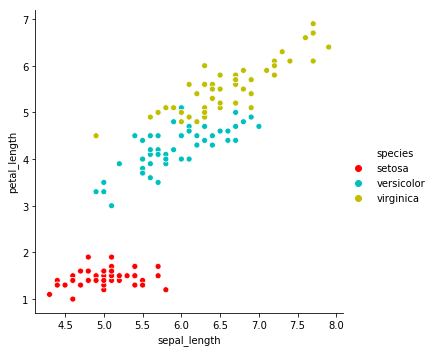

In [83]:
sns.relplot(x='sepal_length', y='petal_length', hue='species' , data = iris_df,  palette=["r", "c", "y"])

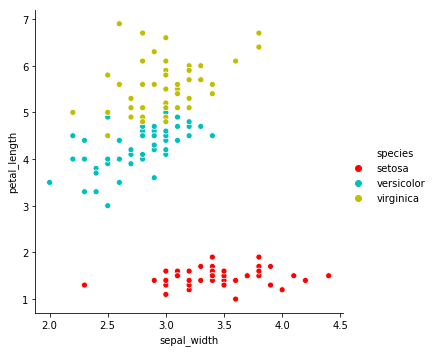

In [84]:
sns.relplot(x='sepal_width', y='petal_length', hue='species' , data = iris_df,  palette=["r", "c", "y"])

Let's seperate all at once

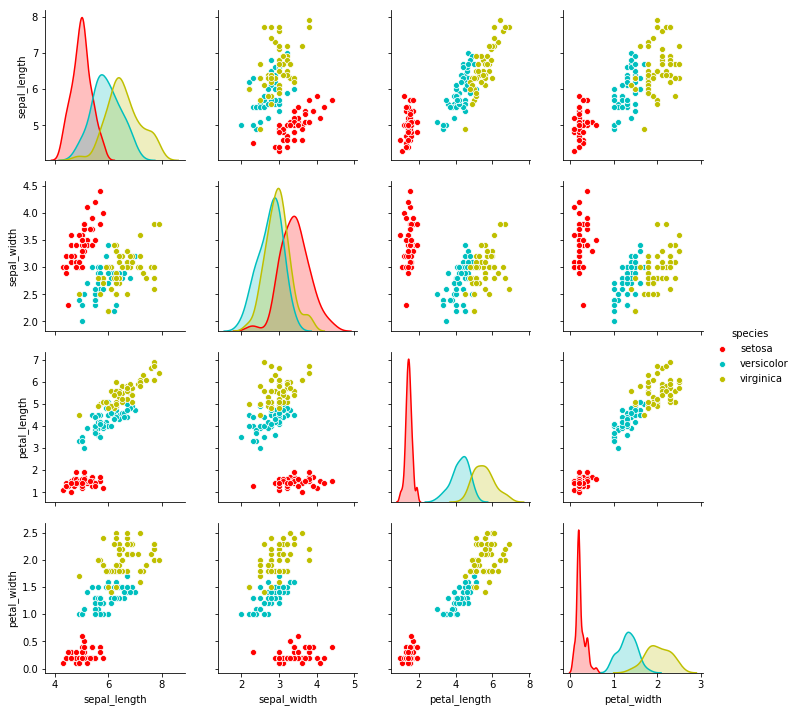

In [85]:
sns.pairplot(iris_df, hue = 'species', palette=["r", "c", "y"])

## k-means clustering

In [86]:
from sklearn.cluster import KMeans

In [87]:
kmeans = KMeans(n_clusters = 3)

In [108]:
target_predict = kmeans.fit_predict(features)

In [109]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [110]:
target_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [111]:
def correct_values(x):
    if x == 1:
        return 0
    elif x ==0:
        return 1
    else:
        return 2
    
vec_correct_values = np.vectorize(correct_values)

In [112]:
## Use if values are shifted
target_predict = vec_correct_values(target_predict)

Counting one cluster with a different name due to how centroids are initialized

#### Check performance metrics

Adjusted rand index - measures similarity between actual and predicted that is also adjusted for chance grouping. 

In [113]:
from sklearn.metrics import adjusted_rand_score

In [114]:
adjusted_rand_score(target, target_predict)

0.7302382722834697

Mutal information score - measures agreement of actual and predicted and normalized against chance grouping 

In [115]:
from sklearn.metrics import adjusted_mutual_info_score

In [116]:
adjusted_mutual_info_score(target, target_predict)

C:\Users\rhall\AppData\Local\Continuum\anaconda3\envs\algoprojs\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7483723933229484

This check is misleading

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [118]:
confusion_matrix(target, target_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [119]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Function taken from: https://scikit-learn.org/stable/_downloads/plot_confusion_matrix.py
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [120]:
labels = ['setosa', 'versicolor', 'virginica']

Confusion matrix, without normalization
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


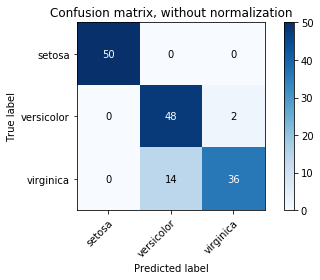

In [121]:
plot_confusion_matrix(target, target_predict, classes = iris.target_names,
                      title='Confusion matrix, without normalization')

Conclusions: k-means is efficient but lets do better.
* Confusion on versicolor and virginica. Will standardizing help?

#### Standardize the data to improve seperation

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
standardizer = StandardScaler()

In [128]:
features_standardized = standardizer.fit_transform(features)

In [132]:
iris_df_stand = pd.concat([pd.DataFrame(features_standardized), target_df], axis = 1, ignore_index = True)
iris_df_stand.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [135]:
iris_df_stand.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


Text(0.5, 1.0, 'Original Iris Data')

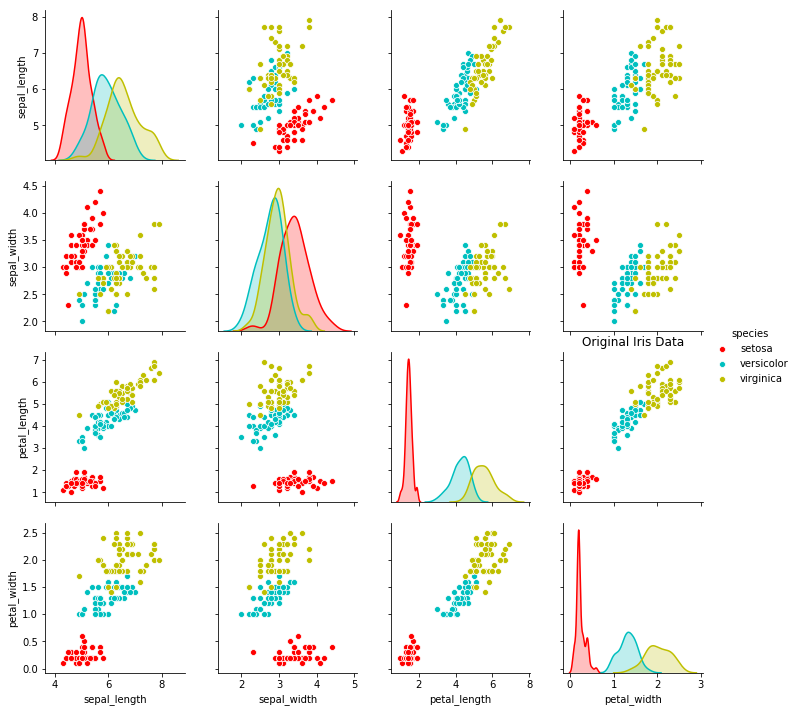

In [146]:
sns.pairplot(iris_df, hue = 'species', palette=["r", "c", "y"] )
plt.title('Original Iris Data')

Text(0.5, 1.0, 'Standardized Iris Data')

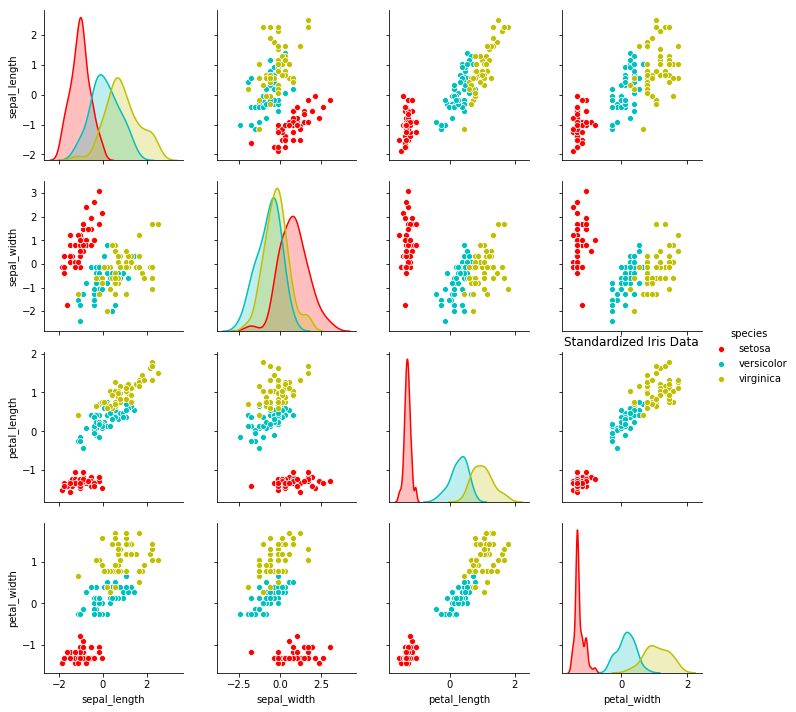

In [147]:
sns.pairplot(iris_df_stand, hue = 'species', palette=["r", "c", "y"])
plt.title('Standardized Iris Data')

No appreciable difference.